In [ ]:
from time import sleep
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re

from glob import glob
import numpy as np
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.layers import Bidirectional, GlobalMaxPool1D
from sklearn.preprocessing import StandardScaler, RobustScaler
import os, re, csv, math, codecs

from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs


from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from sklearn.metrics import *
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd  
from random import random
from keras.utils import to_categorical
import numpy as np
import os
import psutil
from sklearn.model_selection import train_test_split
from keras.utils import *
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from tqdm import tqdm
import pandas as pd
from sklearn import preprocessing
import gc
gc.collect()
from time import sleep

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings("ignore")



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes /

In [ ]:
!gdown --id 1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI&export=download

Downloading...
From: https://drive.google.com/uc?id=1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI
To: /content/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
383MB [00:02, 140MB/s]


In [ ]:
MyList = []
for chunk in 	pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',delimiter=',', chunksize=10000):
  print(len(MyList))
  chunk.fillna(chunk.mean())
  chunk[chunk==np.inf]=np.nan
  chunk.fillna(chunk.mean(), inplace=True)
  MyList.append(chunk)
df = pd.concat(MyList, axis=0)
print(df.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
(1048575, 80)


In [ ]:
df.to_pickle('DataFrame.pkl')   

In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1) 

df['Label']=df['Label'].replace({'Brute Force -Web': 'BruteForceWeb','Brute Force -XSS':'BruteForceXSS','SQL Injection':'SQLInjection'})

In [ ]:
encoder = LabelEncoder()
original_df = df['Label'].copy()

In [ ]:
for col in df.columns:
    print(col)
    if col=="Label":
    	df[col] = encoder.fit_transform(df[col])

Dst Port
Protocol
Timestamp
Flow Duration
Tot Fwd Pkts
Tot Bwd Pkts
TotLen Fwd Pkts
TotLen Bwd Pkts
Fwd Pkt Len Max
Fwd Pkt Len Min
Fwd Pkt Len Mean
Fwd Pkt Len Std
Bwd Pkt Len Max
Bwd Pkt Len Min
Bwd Pkt Len Mean
Bwd Pkt Len Std
Flow Byts/s
Flow Pkts/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Tot
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Tot
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Len
Bwd Header Len
Fwd Pkts/s
Bwd Pkts/s
Pkt Len Min
Pkt Len Max
Pkt Len Mean
Pkt Len Std
Pkt Len Var
FIN Flag Cnt
SYN Flag Cnt
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Down/Up Ratio
Pkt Size Avg
Fwd Seg Size Avg
Bwd Seg Size Avg
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg
Subflow Fwd Pkts
Subflow Fwd Byts
Subflow Bwd Pkts
Subflow Bwd Byts
Init Fwd Win Byts
Init Bwd Win Byts
Fwd Act Data Pkts
Fwd Seg Size Min
Ac

In [ ]:
X_features = df.iloc[:,4:80] #X_features
print("X_features",X_features.shape)
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
print("X_features",X_features.shape)


X_features (1048575, 76)
X_features (1048575, 76)


In [ ]:
number_of_labels = original_df.nunique() 

In [ ]:
# printing value 
print("number_of_labels",number_of_labels)  #4
print(original_df.unique()) #['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection'] 
print((original_df=='Benign').sum())
print((original_df=='BruteForceWeb').sum())  
print((original_df=='BruteForceXSS').sum())  
print((original_df=='SQLInjection').sum())     


number_of_labels 4
['Benign' 'BruteForceWeb' 'BruteForceXSS' 'SQLInjection']
1048009
362
151
53


In [ ]:
columns = list(df) 
print("columns",columns)
arr_labels = original_df.to_numpy()
print("arr_labels",arr_labels)
print("arr_labels",len(arr_labels)) 
print("arr_labels",arr_labels.shape) 
# Total missing values for each feature
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))

columns ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',

In [ ]:
# Any missing values?
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())


df.replace([np.inf, -np.inf], np.nan, inplace=True)




Any missing values? False
Total number of missing values 0


In [ ]:
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))


Total missing values for each feature Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max        

In [ ]:
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())



Any missing values? False
Total number of missing values 0


In [ ]:
print("df.shape",df.shape) 


df.shape (1048575, 80)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 = le.fit_transform(arr_labels)


In [ ]:
encoded1=np.array(X_features)

In [ ]:
y3=y1
encoded3=encoded1

In [ ]:
trainX_data, testX_data, Y_TRAIN, Y_TEST = train_test_split(encoded1, y1, test_size=0.50, shuffle= True)

In [ ]:
# describes info about train and test set 
print(" ") 
print("WORKING OF SMOTE ALGORITHM") 
print(" ") 
print("Y_TRAIN Number transactions X_train dataset: ", trainX_data.shape) 
print("Y_TRAIN Number transactions y_train dataset: ", Y_TRAIN.shape) 
print("Y_TRAIN Number transactions X_test dataset: ", testX_data.shape) 
print("Y_TRAIN Number transactions y_test dataset: ", Y_TEST.shape) 



 
WORKING OF SMOTE ALGORITHM
 
Y_TRAIN Number transactions X_train dataset:  (524287, 76)
Y_TRAIN Number transactions y_train dataset:  (524287,)
Y_TRAIN Number transactions X_test dataset:  (524288, 76)
Y_TRAIN Number transactions y_test dataset:  (524288,)


In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(Y_TRAIN == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_TRAIN == 0))) 
print("Before OverSampling, counts of label '2': {}".format(sum(Y_TRAIN == 2))) 
print("Before OverSampling, counts of label '3': {} \n".format(sum(Y_TRAIN == 3))) 


Before OverSampling, counts of label '1': 186
Before OverSampling, counts of label '0': 524001 

Before OverSampling, counts of label '2': 74
Before OverSampling, counts of label '3': 26 



In [ ]:
print("Y_TEST Before OverSampling, counts of label '1': {}".format(sum(Y_TEST == 1))) 
print("Y_TEST Before OverSampling, counts of label '0': {} \n".format(sum(Y_TEST == 0))) 
print("Y_TEST Before OverSampling, counts of label '2': {}".format(sum(Y_TEST == 2))) 
print("Y_TEST Before OverSampling, counts of label '3': {} \n".format(sum(Y_TRAIN == 3))) 



Y_TEST Before OverSampling, counts of label '1': 176
Y_TEST Before OverSampling, counts of label '0': 524008 

Y_TEST Before OverSampling, counts of label '2': 77
Y_TEST Before OverSampling, counts of label '3': 26 



In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
encoded4, y4 = sm.fit_sample(encoded3, y3.ravel()) 
X_train_res, y_train_res = sm.fit_sample(trainX_data, Y_TRAIN.ravel()) 
X_test_res, y_test_res = sm.fit_sample(testX_data, Y_TEST.ravel()) 

In [ ]:
print('After OverSampling, the shape of encoded4: {}'.format(encoded4.shape)) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape)) 
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape)) 

After OverSampling, the shape of encoded4: (4192036, 76)
After OverSampling, the shape of train_X: (2096004, 76)
After OverSampling, the shape of train_y: (2096004,) 

After OverSampling, the shape of test_X: (2096032, 76)
After OverSampling, the shape of test_y: (2096032,) 



In [ ]:
print("After OverSampling, counts of label '1' train: {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0' train : {}".format(sum(y_train_res == 0))) 
print("Before OverSampling, counts of label '2' train: {}".format(sum(y_train_res == 2))) 
print("Before OverSampling, counts of label '3' train: {} \n".format(sum(y_train_res == 3))) 


print("After OverSampling, counts of label '1 test': {}".format(sum(y_test_res == 1))) 
print("After OverSampling, counts of label '0' test: {}".format(sum(y_test_res == 0))) 
print("Before OverSampling, counts of label '2' test: {}".format(sum(y_test_res == 2))) 
print("Before OverSampling, counts of label '3' test: {} \n".format(sum(y_test_res == 3))) 


After OverSampling, counts of label '1' train: 524001
After OverSampling, counts of label '0' train : 524001
Before OverSampling, counts of label '2' train: 524001
Before OverSampling, counts of label '3' train: 524001 

After OverSampling, counts of label '1 test': 524008
After OverSampling, counts of label '0' test: 524008
Before OverSampling, counts of label '2' test: 524008
Before OverSampling, counts of label '3' test: 524008 



In [ ]:
print("END OF SMOTE ALGORITHM") 

END OF SMOTE ALGORITHM


In [ ]:
Y_TRAIN=to_categorical(y_train_res,num_classes=4)
Y_TEST=to_categorical(y_test_res,num_classes=4)
trainX_data=np.reshape(X_train_res,(X_train_res.shape[0],X_train_res.shape[1],1))
testX_data=np.reshape(X_test_res,(X_test_res.shape[0],X_test_res.shape[1],1))


In [ ]:
print("Number transactions X_train dataset: ", trainX_data.shape) 
print("Number transactions y_train dataset: ", Y_TRAIN.shape) 
print("Number transactions X_test dataset: ", testX_data.shape) 
print("Number transactions y_test dataset: ", Y_TEST.shape) 
#sleep(100)

Number transactions X_train dataset:  (2096004, 76, 1)
Number transactions y_train dataset:  (2096004, 4)
Number transactions X_test dataset:  (2096032, 76, 1)
Number transactions y_test dataset:  (2096032, 4)


n_classes 4
y [0 0 0 ... 3 3 3]


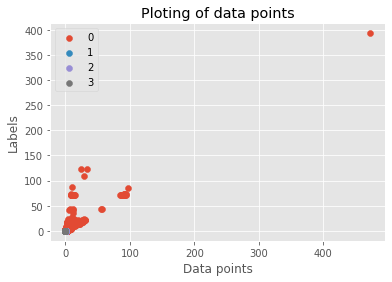

In [ ]:
# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = len(unique(y))
	print("n_classes",n_classes)
	print("y",y)
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = where(y == class_value)[0]
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	plt.title("Ploting of data points")
	plt.ylabel('Labels')
	plt.xlabel('Data points')
	# show the plot
	pyplot.show()

plot_dataset(X_train_res, y_train_res)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K


In [ ]:
input_img= Input(shape=(76,))

encoded = Dense(units=76, activation='relu')(input_img)
encoded = Dense(units=100, activation='relu')(encoded)
encoded = Dense(units=50, activation='relu')(encoded)
encoded = Dense(units=25, activation='relu')(encoded)
encoded = Dense(units=12, activation='relu')(encoded)
encoded = Dense(units=6, activation='relu')(encoded)

decoded = Dense(units=12, activation='relu')(encoded)
decoded = Dense(units=25, activation='relu')(decoded)
decoded = Dense(units=50, activation='relu')(decoded)
decoded = Dense(units=100, activation='relu')(decoded)
decoded = Dense(units=200, activation='relu')(decoded)
decoded = Dense(units=76, activation='softmax')(decoded)

autoencoder=Model(input_img, decoded)


In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense (Dense)                (None, 76)                5852      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               7700      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 78    

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense (Dense)                (None, 76)                5852      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               7700      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 78  

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.fit(X_train_res, X_train_res,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_res, X_test_res))
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/40
8188/8188 [==============================] - 43s 5ms/step - loss: 39.1482 - accuracy: 0.7412 - val_loss: 39.3822 - val_accuracy: 0.0563
Epoch 2/40
8188/8188 [==============================] - 38s 5ms/step - loss: 40.1552 - accuracy: 0.0638 - val_loss: 39.3810 - val_accuracy: 0.0910
Epoch 3/40
8188/8188 [==============================] - 38s 5ms/step - loss: 40.1212 - accuracy: 0.1197 - val_loss: 39.3640 - val_accuracy: 0.0599
Epoch 4/40
8188/8188 [==============================] - 38s 5ms/step - loss: 40.0674 - accuracy: 0.0627 - val_loss: 39.3816 - val_accuracy: 0.0689
Epoch 5/40
8188/8188 [==============================] - 38s 5ms/step - loss: 40.0846 - accuracy: 0.0583 - val_loss: 38.3225 - val_accuracy: 0.8237
Epoch 6/40
8188/8188 [==============================] - 38s 5ms/step - loss: 39.1044 - accuracy: 0.8402 - val_loss: 38.3196 - val_accuracy: 0.8499
Epoch 7/40
8188/8188 [==============================] - 38s 5ms/step - loss: 39.1434 - accuracy: 0.8523 - val_loss: 38

In [ ]:

pre_test=encoder.predict(X_test_res)
print(pre_test.shape)
pre_test=np.reshape(pre_test,(pre_test.shape[0],pre_test.shape[1],1))
print(pre_test.shape)

pre_train=encoder.predict(X_train_res)
print(pre_train.shape)
pre_train=np.reshape(pre_train,(pre_train.shape[0],pre_train.shape[1],1))
print(pre_train.shape)


(2096032, 6)
(2096032, 6, 1)
(2096004, 6)
(2096004, 6, 1)


In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(128,input_shape=(pre_train.shape[1],pre_train.shape[2]),return_sequences=True))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            66560     
_________________________________________________________________
bidirectional (Bidirectional (None, 6, 128)            98816     
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 264,708
Trainable params: 264,708
Non-trainable params: 0
__________________________________________________

In [ ]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("check.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
model.fit(pre_train, Y_TRAIN,batch_size=64, epochs=1, verbose=1,validation_data=(pre_test,Y_TEST))

32751/32751 [==============================] - 470s 13ms/step - loss: 0.0232 - accuracy: 0.9910 - val_loss: 0.0302 - val_accuracy: 0.9983


In [ ]:
yhat_classes = model.predict_classes(pre_test, verbose=1)

65501/65501 [==============================] - 244s 4ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools    
print(" ") 
print("START OF CONFUSION CALCULATION") 

print('Confusion Matrix Calculation')
cm=confusion_matrix(y_test_res, yhat_classes)
print("Confusion Matrix",cm)

 
START OF CONFUSION CALCULATION
Confusion Matrix Calculation
Confusion Matrix [[524008      0      0      0]
 [     0 524008      0      0]
 [     0      0 520496   3512]
 [     0      0      0 524008]]


Confusion matrix, without normalization
[[524008      0      0      0]
 [     0 524008      0      0]
 [     0      0 520496   3512]
 [     0      0      0 524008]]


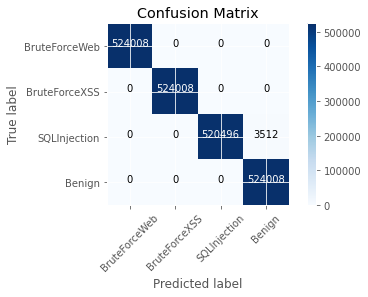

END OF CONFUSION CALCULATION
 


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
cm_plot_labels = ['BruteForceWeb','BruteForceXSS','SQLInjection','Benign']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("END OF CONFUSION CALCULATION") 
print(" ") 

In [ ]:
accuracy = accuracy_score(y_test_res, yhat_classes)
print('Testing Accuracy: %f' % accuracy)
precision = precision_score(y_test_res, yhat_classes,average='weighted')
print('Testing Precision: %f' % precision)
recall = recall_score(y_test_res, yhat_classes,average='weighted')
print('Testing Recall: %f' % recall)
f1 = f1_score(y_test_res, yhat_classes,average='weighted')
print('Testing F1 score: %f' % f1)





Testing Accuracy: 0.998324
Testing Precision: 0.998336
Testing Recall: 0.998324
Testing F1 score: 0.998324
